## Fork of the work done by EDA Team 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
class cfg():
    train_path = "/content/drive/MyDrive/Omdena Project/Student Performance/Data/train-student-mat.csv"
    test_path = "/content/drive/MyDrive/Omdena Project/Student Performance/Data/test-student-mat.csv"

    test_size = 0.3

    loss = "mean_absolute_error"

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

In [ ]:
# Function created by the EDA Team 1

def get_ses_status_score(row):
    # Calculate the SES score based on relevant features
    ses_score = 0

    # Add points based on parents' education
    if row['Medu'] in ['0']:
        ses_score += 1
    elif row['Medu'] in ['1', '2']:
        ses_score += 2
    elif row['Medu'] == '3':
        ses_score += 3
    elif row['Medu'] == '4':
        ses_score += 4

    if row['Fedu'] in ['0', '1']:
        ses_score += 1
    elif row['Fedu'] == '2':
        ses_score += 2
    elif row['Fedu'] == '3':
        ses_score += 3
    elif row['Fedu'] == '4':
        ses_score += 4

    # Add points based on parents' occupation (Mother_job and Father_job)
    if row['Mjob'] in ['at_home', 'other']:
        ses_score += 1
    elif row['Mjob'] in ['teacher', 'health', 'services']:
        ses_score += 2

    if row['Fjob'] in ['at_home', 'other']:
        ses_score += 1
    elif row['Fjob'] in ['teacher', 'health', 'services']:
        ses_score += 2

    # Add points based on family size (famsize)
    if row['famsize'] == 'LE3':
        ses_score += 1

    # Add points based on address (Urban or Rural)
    if row['address'] == 'U':
        ses_score += 1

    # Add points based on Parents_status (Together or Apart)
    if row['Pstatus'] == 'T':
        ses_score += 1

    # Add points based on guardian
    if row['guardian'] in ['mother', 'father']:
        ses_score += 1
    elif row['guardian'] == 'other':
        ses_score += 2

    # Add points based on school_support, fam_support, paid_extra_classes, higher_edu, internet, and nursery
    if row['schoolsup'] == 'yes':
        ses_score += 1

    if row['famsup'] == 'yes':
        ses_score += 1

    if row['paid'] == 'yes':
        ses_score += 1

    if row['higher'] == 'yes':
        ses_score += 1

    if row['internet'] == 'yes':
        ses_score += 1

    if row['nursery'] == 'yes':
        ses_score += 1

    return ses_score

In [ ]:
# Reading dataframes
train = pd.read_csv(cfg.train_path)
test = pd.read_csv(cfg.test_path)

In [ ]:
# Code block to calculate ses score for both train and test dataframes
# FORK from EDA Team 1's work

train['ses_score'] = train.apply(get_ses_status_score, axis=1)
test['ses_score'] = test.apply(get_ses_status_score, axis=1)


# Calculate quartiles to derive threshold values
q1 = np.percentile(train['ses_score'], 25)
q2 = np.percentile(train['ses_score'], 50)  # Median
q3 = np.percentile(train['ses_score'], 75)

# Print the calculated quartiles
print("1st Quartile (25th percentile):", q1)
print("2nd Quartile (Median, 50th percentile):", q2)
print("3rd Quartile (75th percentile):", q3)

def get_ses_status_category(row):
    # Categorize SES score into 'Low', 'Medium', and 'High'
    if row['ses_score'] < q1:
        return 'Low'
    elif row['ses_score'] <= q2:
        return 'Medium'
    else:
        return 'High'

train['ses_status'] = train.apply(get_ses_status_category, axis=1)
test['ses_status'] = test.apply(get_ses_status_category, axis=1)

# Dropping the features used in calculating ses_status
train = train.drop(['address', 'famsize' , 'Pstatus','Medu','Fedu','Mjob','Fjob',
            'guardian','famsup','schoolsup', 'internet','paid','higher','nursery', 'ses_score', 'Unnamed: 0'], axis = 1)
test = test.drop(['address', 'famsize' , 'Pstatus','Medu','Fedu','Mjob','Fjob',
            'guardian','famsup','schoolsup', 'internet','paid','higher','nursery', 'ses_score', 'Unnamed: 0'], axis = 1)






1st Quartile (25th percentile): 9.0
2nd Quartile (Median, 50th percentile): 10.0
3rd Quartile (75th percentile): 11.0


In [ ]:
def get_final_score_category(row):

    if row['Final_Score'] < 10:
        return 0
    else:
        return 1


train['Final_status'] = train.apply(get_final_score_category, axis=1)
test['Final_status'] = test.apply(get_final_score_category, axis=1)

In [ ]:
train['avg_alc'] = (train['Dalc'] + train['Walc']) / 2
train = train.drop(['Dalc', 'Walc'], axis = 1)

test['avg_alc'] = (test['Dalc'] + test['Walc']) / 2
test = test.drop(['Dalc', 'Walc'], axis = 1)

In [ ]:
label = {'no': 0, 'yes': 1}
train['romantic'] = train['romantic'].map(label)
test['romantic'] = test['romantic'].map(label)

# Perform the ANOVA test for go out with friends vs. Final Score
goout_anova_result = f_oneway(
    train[train['goout'] == 1]['Final_Score'],
    train[train['goout'] == 2]['Final_Score'],
    train[train['goout'] == 3]['Final_Score'],
    train[train['goout'] == 4]['Final_Score'],
    train[train['goout'] == 5]['Final_Score']
)

# Perform the ANOVA test for family relationship vs. Final Score
fam_anova_result = f_oneway(
    train[train['famrel'] == 1]['Final_Score'],
    train[train['famrel'] == 2]['Final_Score'],
    train[train['famrel'] == 3]['Final_Score'],
    train[train['famrel'] == 4]['Final_Score'],
    train[train['famrel'] == 5]['Final_Score']
)

# Perform the ANOVA test for Romantic relationship vs. Final Score
rom_anova_result = f_oneway(
    train[train['romantic'] == 1]['Final_Score'],
    train[train['romantic'] == 0]['Final_Score']
)

print("ANOVA test result:")

# Print the ANOVA test result for go out with friends vs final score
print("go out with friend vs. Final Score:  F-statistic =", goout_anova_result.statistic, " p =", goout_anova_result.pvalue)

# Print the ANOVA test result for family relationship vs final score
print("family relationship vs. Final Score: F-statistic =", fam_anova_result.statistic, "p =", fam_anova_result.pvalue)

# Print the ANOVA test result for relationship vs final score
print("romantic relationship vs. Final Score:F-statistic =", rom_anova_result.statistic, "  p =", rom_anova_result.pvalue)

ANOVA test result:
go out with friend vs. Final Score:  F-statistic = 3.016701015389935  p = 0.01850246265483004
family relationship vs. Final Score: F-statistic = 0.6095286286185053 p = 0.6561039147721099
romantic relationship vs. Final Score:F-statistic = 2.363818079632197   p = 0.12532769637755245


In [ ]:
def calculate_social_score(row):
    friends_weight = 0.55
    romantic_weight = 0.35
    family_weight = 0.10

    # Calculate the social score using weighted average
    social_score = (row['famrel'] * family_weight +
                    row['goout'] * friends_weight +
                    row['romantic'] * romantic_weight)

    # Round the social_score to the nearest integer and return it
    return int(round(social_score))

In [ ]:
# Apply the function to create the 'social_score' feature in the DataFrame
train['social_score'] = train.apply(calculate_social_score, axis=1)
test['social_score'] = test.apply(calculate_social_score, axis=1)


q1 = np.percentile(train['social_score'], 25)
q2 = np.percentile(train['social_score'], 50)  # Median
q3 = np.percentile(train['social_score'], 75)

# Print the calculated quartiles
print("1st Quartile (25th percentile):", q1)
print("2nd Quartile (Median, 50th percentile):", q2)
print("3rd Quartile (75th percentile):", q3)


# Define the categories for 'social_score'
train['social_score_category'] = pd.cut(train['social_score'], bins=[0, q1, q3, 1000], labels=['Very Bad', 'Neutral', 'Excellent'])
train = train.drop(['famrel', 'romantic', 'goout', 'social_score'], axis = 1)

test['social_score_category'] = pd.cut(test['social_score'], bins=[0, q1, q3, 1000], labels=['Very Bad', 'Neutral', 'Excellent'])
test = test.drop(['famrel', 'romantic', 'goout', 'social_score'], axis = 1)


1st Quartile (25th percentile): 2.0
2nd Quartile (Median, 50th percentile): 2.0
3rd Quartile (75th percentile): 3.0


In [ ]:
label1 = {'no': 0, 'yes': 1}
train['activities'] = train['activities'].map(label1)
test['activities'] = test['activities'].map(label1)

In [ ]:
label2={'course':0,'other':1,'home':2,'reputation':3}
train['reason'] = train['reason'].map(label2)
test['reason'] = test['reason'].map(label2)

In [ ]:
label3 = {'M': 0, 'F': 1}
train['sex'] = train['sex'].map(label3)
test['sex'] = test['sex'].map(label3)

In [ ]:
label4 = {'MS': 0, 'GP': 1}
train['school'] = train['school'].map(label4)
test['school'] = test['school'].map(label4)

In [ ]:
label5 = {'Very Bad': 0, 'Neutral': 1,'Excellent':2}
train['social_score_category'] = train['social_score_category'].map(label5)
test['social_score_category'] = test['social_score_category'].map(label5)

In [ ]:
label6={'Low':0, 'Medium':1,'High':2}
train['ses_status'] = train['ses_status'].map(label6)
test['ses_status'] = test['ses_status'].map(label6)

In [ ]:
train

,id,school,sex,age,reason,traveltime,studytime,failures,activities,freetime,health,absences,G1,G2,G3,Final_Score,ses_status,Final_status,avg_alc,social_score_category
0,1,1,1,17,0,1,2,0,0,3,3,4,5,5,6,5.4,0,0,1.0,0
1,2,1,1,15,1,1,2,3,0,3,3,10,7,8,10,8.5,2,0,2.5,0
2,4,1,1,16,2,1,2,0,0,3,5,4,6,10,10,8.8,1,0,1.5,0
3,6,1,0,16,2,1,2,0,0,4,3,0,12,12,11,11.6,1,1,1.0,1
4,8,1,0,15,2,1,2,0,0,2,1,0,16,18,19,17.8,2,1,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,387,0,1,19,0,1,3,1,1,4,5,0,7,5,0,3.6,0,0,1.5,0
273,388,0,1,18,0,1,2,0,0,3,1,0,7,9,8,8.0,2,0,1.0,1
274,389,0,1,18,0,2,2,1,1,1,5,0,6,5,0,3.3,0,0,1.0,0
275,392,0,0,21,0,1,1,3,0,5,3,3,10,8,7,8.2,0,0,3.0,0


In [ ]:
X_train=train.drop(['Final_Score','Final_status','id','G1','G2','G3'],axis=1)
y_train=train['Final_status']
X_test=test.drop(['Final_Score','Final_status','id','G1','G2','G3'],axis=1)
y_test=test['Final_status']

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 8, 14],
       [11, 51]])

In [ ]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 70.23809523809523


In [ ]:
f1 = f1_score(y_pred, y_test, average="weighted")
print("F1 Score:", f1)

F1 Score: 0.709754268521313


# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

# Predict on dataset which model has not seen before
print(knn.predict(X_test))

[1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1
 0 1 1 0 1 0 1 1 1 1]


In [ ]:
print(knn.score(X_test, y_test))

0.6190476190476191


In [ ]:
from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : [2,3,4,5,7,9,11,13,15,16,17,18],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


In [ ]:
g_res.best_score_

0.6319711538461538

In [ ]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'uniform'}

In [ ]:
knn = KNeighborsClassifier(n_neighbors =17, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=17)

In [ ]:
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

In [ ]:
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  0.6683937823834197
Test set accuracy:  0.7023809523809523


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_knn))

[[ 9 13]
 [12 50]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.43      0.41      0.42        22
           1       0.79      0.81      0.80        62

    accuracy                           0.70        84
   macro avg       0.61      0.61      0.61        84
weighted avg       0.70      0.70      0.70        84



In [ ]:
from sklearn.model_selection import cross_val_score
 # Import the appropriate classifier (or regressor)

# Perform cross-validation on the training set
cv_scores = cross_val_score(knn, X_train, y_train, cv=17)

# Print the cross-validation scores for each fold
print("Cross-validation scores:", cv_scores)

# Calculate and print the average cross-validation score
average_cv_score = cv_scores.mean()
print("Average cross-validation score:", average_cv_score)

Cross-validation scores: [0.58333333 0.66666667 0.75       0.5        0.83333333 0.83333333
 0.45454545 0.54545455 0.45454545 0.72727273 0.63636364 0.63636364
 0.54545455 0.54545455 0.54545455 0.54545455 0.54545455]
Average cross-validation score: 0.6087344028520498


In [ ]:
print('Model accuracy: ',np.mean(cv_scores))

Model accuracy:  0.6087344028520498


# **RANDOM FOREST**

In [ ]:

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
CV_rfc.fit(X_train, y_train)

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTr

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [ ]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=6, criterion='gini')

In [ ]:
rfc1.fit(X_train, y_train)

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.


RandomForestClassifier(max_depth=6, max_features='auto', n_estimators=200,
                       random_state=42)

In [ ]:
pred=rfc1.predict(X_test)

In [ ]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.7023809523809523


**Feature Importance**

In [ ]:
!pip install shap
import shap

In [ ]:
explainer = shap.TreeExplainer(rfc1)
shap_values = explainer.shap_values(X_test)

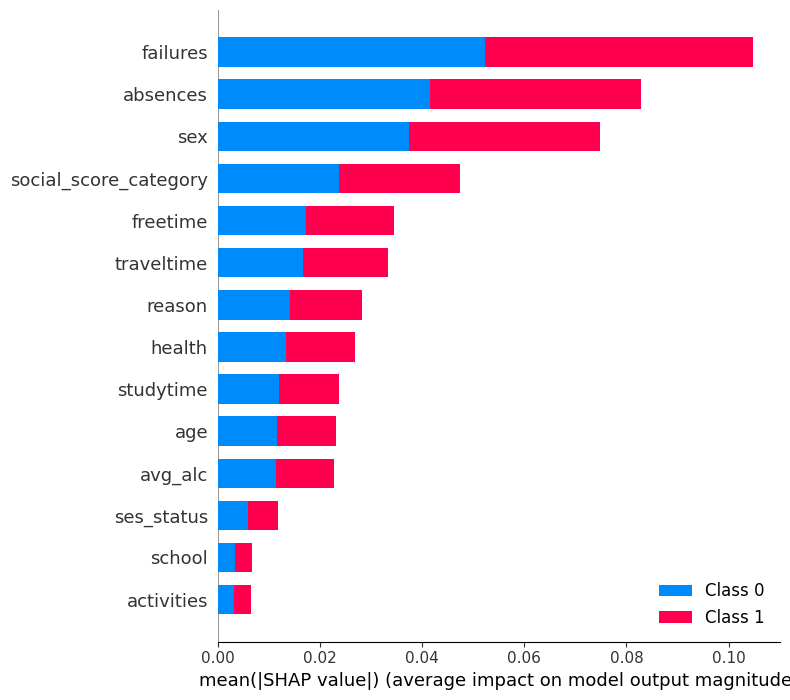

In [138]:
feature_names = ['school', 'sex', 'age','reason', 'traveltime', 'studytime','failures', 'activities', 'freetime','health', 'absences', 'ses_status','avg_alc','social_score_category']
# Create the SHAP summary plot with feature names
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=feature_names)

GaussainNB and Random Forest has the highest accuracy of 70%.


Failures and absences have the most impact on our models.